# Sentiment Analysis of movie reviews.

For this project we will use a dataset of movie reviews from the IMDb (Internet Movie Database) website collected by Stanford researcher Andrew Maas. This dataset contains the text of the reviews, together with a label that indicates whether a review is “positive” or “negative.” The IMDb website itself contains ratings from 1 to 10. To simplify the modeling, this annotation is summarized as a two-class classification dataset where reviews with a score of 6 or higher are labeled as positive, and the rest as negative. 

### Loading the train dataset.
After unpacking the data, the dataset is provided as text files in two separate folders, one for the training data and one for the test data. Each of these in turn has two subfolders, one called pos and one called neg.

In [1]:
from sklearn.datasets import load_files

reviews_train = load_files("/Users/mayanktripathi/Downloads/aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels 
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train))) 
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 75000
text_train[1]:
b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.<br /><br />The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.<br /><br />OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.<br /><br />For the positives, you can take hot actresses, last 30 minutes,

In [2]:
#Cleaning the data of HTML line breaks.
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [3]:
# Samples per class
import numpy as np

print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500 50000]


### Loading the test datset.

In [4]:
reviews_test = load_files("/Users/mayanktripathi/Downloads/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target 
print("Number of documents in test data: {}".format(len(text_test))) 
print("Samples per class (test): {}".format(np.bincount(y_test))) 
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


### Representing text as a bag of words.

The text data is not in a format that a machine learning model can handle. We need to convert the string representation of the text into a numeric representation that we can apply our machine learning algorithms to. In representing text as a bag of words, we discard the structure of input text like chapters, paragraphs etc and only **count how often each word appears in each text**. The bag-of-words representation is stored in a SciPy sparse matrix that only stores the entries that are nonzero. This consists of three steps:
1. Tokenization: Split each document into the words that appear in it (called tokens).
2. Vocabulary building. Collect a vocabulary of all words that appear in any of the documents, and number them (say, in alphabetical order).
3. Encoding. For each document, count how often each of the words in the vocabu‐ lary appear in this document.

In [5]:
# The bag-of-words representation is implemented in CountVectorizer, which is a transformer. 
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(text_train) 
X_train = vect.transform(text_train) 
print("X_train:\n{}".format(repr(X_train)))

X_train:
<75000x124255 sparse matrix of type '<class 'numpy.int64'>'
	with 10315542 stored elements in Compressed Sparse Row format>


The shape of X_train, the bag-of-words representation of the training data, is 75,000×124255, indicating that the vocabulary contains 124255 entries.

In [6]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20])) 
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030])) 
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 124255
First 20 features:
['00', '000', '0000', '0000000000000000000000000000000001', '0000000000001', '000000001', '000000003', '00000001', '000001745', '00001', '0001', '00015', '0002', '0007', '00083', '000ft', '000s', '000th', '001', '002']
Features 20010 to 20030:
['cheapen', 'cheapened', 'cheapening', 'cheapens', 'cheaper', 'cheapest', 'cheapie', 'cheapies', 'cheapjack', 'cheaply', 'cheapness', 'cheapo', 'cheapozoid', 'cheapquels', 'cheapskate', 'cheapskates', 'cheapy', 'chearator', 'cheat', 'cheata']
Every 2000th feature:
['00', '_require_', 'aideed', 'announcement', 'asteroid', 'banquière', 'besieged', 'bollwood', 'btvs', 'carboni', 'chcialbym', 'clotheth', 'consecration', 'cringeful', 'deadness', 'devagan', 'doberman', 'duvall', 'endocrine', 'existent', 'fetiches', 'formatted', 'garard', 'godlie', 'gumshoe', 'heathen', 'honoré', 'immatured', 'interested', 'jewelry', 'kerchner', 'köln', 'leydon', 'lulu', 'mardjono', 'meistersinger', 'misspells', 'mumblecore'

One way to cut back on the numbers of tokens is to only use tokens that appear in at least five documents. A token that appears only in a single document is unlikely to appear in the test set and is therefore not helpful. We can set the minimum number of documents a token needs to appear in with the min_df parameter. This brings down the number of features from 124255 to 44352. Having fewer features to deal with speeds up processing and throwing away useless features might make the model more interpretable.

In [7]:
vect = CountVectorizer(min_df=5).fit(text_train) 
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <75000x44532 sparse matrix of type '<class 'numpy.int64'>'
	with 10191240 stored elements in Compressed Sparse Row format>


In [8]:
feature_names = vect.get_feature_names()
print("First 50 features:\n{}".format(feature_names[:50])) 
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030])) 
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00', '000', '001', '007', '00am', '00pm', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '1001', '100k', '100th', '100x', '101', '101st', '102', '103', '104', '105', '106', '107', '108', '109', '10am', '10pm', '10s', '10th', '10x', '11', '110', '1100', '110th', '111', '112', '1138', '115', '116', '117', '11pm', '11th']
Features 20010 to 20030:
['inert', 'inertia', 'inescapable', 'inescapably', 'inevitability', 'inevitable', 'inevitably', 'inexcusable', 'inexcusably', 'inexhaustible', 'inexistent', 'inexorable', 'inexorably', 'inexpensive', 'inexperience', 'inexperienced', 'inexplicable', 'inexplicably', 'inexpressive', 'inextricably']
Every 700th feature:
['00', 'accountability', 'alienate', 'appetite', 'austen', 'battleground', 'bitten', 'bowel', 'burton', 'cat', 'choreographing', 'collide', 'constipation', 'creatively', 'dashes', 'descended', 'dishing', 'dramatist', 'ejaculation', 'epitomize', 'extinguished', 'figment', 'forgot'

### Stopwords.
Another way that we can get rid of uninformative words is by discarding words that are too frequent to be informative. There are two main approaches: using a language specific list of stopwords, or discarding words that appear too frequently.

In [9]:
# printing english stop words.
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS))) 
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['whose', 'yourselves', 'seem', 'still', 'over', 'which', 'also', 'how', 'since', 'system', 'much', 'con', 'always', 'else', 'detail', 'whereafter', 'nobody', 'and', 'among', 'thru', 'perhaps', 'de', 'top', 'co', 'inc', 'mine', 'noone', 'off', 'sixty', 'take', 'either', 'cannot']


In [10]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train) 
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<75000x44223 sparse matrix of type '<class 'numpy.int64'>'
	with 6577418 stored elements in Compressed Sparse Row format>


### Rescaling the data with tf-idf and training a ML model.
Instead of dropping features that are deemed unimportant, another approach is to rescale features by how informative we expect them to be. One of the most common ways to do this is using the term frequency–inverse document frequency (tf–idf) method. The intuition of this method is to give high weight to any term that appears often in a particular document, but not in many documents in the corpus.

In [11]:
# increase the number of iterations to get better 0.89 cross validation score.
# my poor laptop could only handle 200.
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                         LogisticRegression(max_iter = 200))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Best cross-validation score: 0.72


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
# We can inspect which words tf-idf found the most important.
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]

# transform the training dataset
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over the dataset 
max_value = X_train.max(axis=0).toarray().ravel() 
sorted_by_tfidf = max_value.argsort()

# get feature names
feature_names = np.array(vectorizer.get_feature_names()) 
print("Features with lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:20]])) 
print("Features with highest tfidf: \n{}".format(
feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['remained' 'acclaimed' 'combines' 'rapidly' 'uniformly' 'diverse'
 'avoiding' 'fills' 'feeble' 'admired' 'wherever' 'admission' 'abound'
 'starters' 'assure' 'pivotal' 'comprehend' 'deliciously' 'strung'
 'inadvertently']
Features with highest tfidf: 
['nukie' 'reno' 'dominick' 'taz' 'ling' 'rob' 'victoria' 'turtles'
 'khouri' 'lorenzo' 'id' 'zizek' 'elwood' 'nikita' 'rishi' 'timon'
 'titanic' 'zohan' 'pammy' 'godzilla']


Features with low tf–idf are those that either are very commonly used across documents or are only used sparingly, and only in very long documents.
We can also find the words that have low inverse document frequency that is, those that appear frequently and are therefore deemed less important. The inverse document frequency values found on the training set are stored in the idf_ attribute.

In [13]:
sorted_by_idf = np.argsort(vectorizer.idf_) 
print("Features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'one' 'be' 'have' 'are' 'film' 'you' 'all'
 'at' 'an' 'by' 'from' 'so' 'like' 'who' 'there' 'they' 'his' 'if' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'can' 'good' 'when' 'more'
 'up' 'time' 'very' 'even' 'only' 'no' 'see' 'would' 'my' 'story' 'really'
 'which' 'well' 'had' 'me' 'than' 'their' 'much' 'were' 'get' 'other' 'do'
 'been' 'most' 'also' 'into' 'don' 'her' 'first' 'great' 'how' 'made'
 'people' 'will' 'make' 'because' 'way' 'could' 'bad' 'we' 'after' 'them'
 'too' 'any' 'then' 'movies' 'watch' 'she' 'think' 'seen' 'acting' 'its'
 'characters']


**Interestingly, "good", "great", and "bad" are also among the most frequent and therefore “least relevant” words according to the tf–idf measure, even though we might expect these to be very important for our sentiment analysis task.**

In [ ]:
import mglearn
mglearn.tools.visualize_coefficients(
        grid.best_estimator_.named_steps["logisticregression"].coef_,
        feature_names, n_top_features=40)

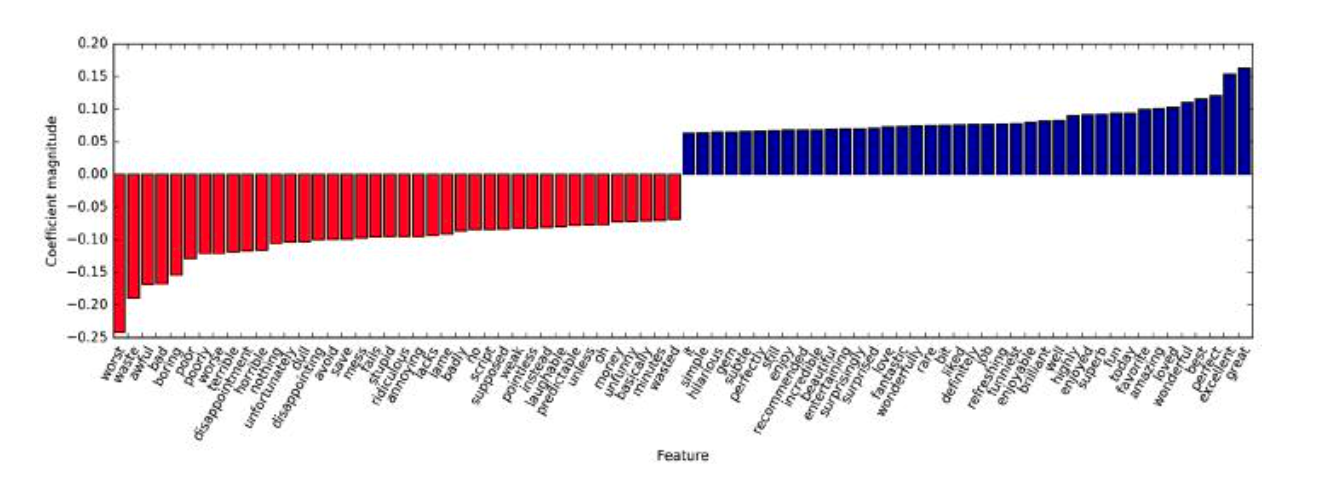

The negative coefficients on the left belong to words that according to the model are indicative of negative reviews, while the positive coefficients on the right belong to words that according to the model indicate positive reviews.

### Bag of words with more than one word (n-Grams).

One of the main disadvantages of using a bag-of-words representation is that word order is completely discarded. Therefore, the two strings “it’s bad, not good at all” and “it’s good, not bad at all” have exactly the same representation, even though the meanings are inverted. There is a way of capturing context when using a bag-of-words representation, by not only considering the counts of single tokens, but also the counts of pairs or triplets of tokens that appear next to each other. Pairs of tokens are known as bigrams, triplets of tokens are known as trigrams, and more generally sequences of tokens are known as n-grams.

In [ ]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter = 200)) 

# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
                  "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 
print("Best parameters:\n{}".format(grid.best_params_))

In [ ]:
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T 

# visualize heat map
heatmap = mglearn.tools.heatmap(
        scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
        xticklabels=param_grid['logisticregression__C'],
        yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

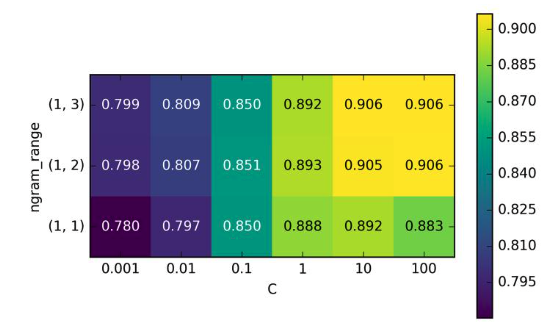

In [ ]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

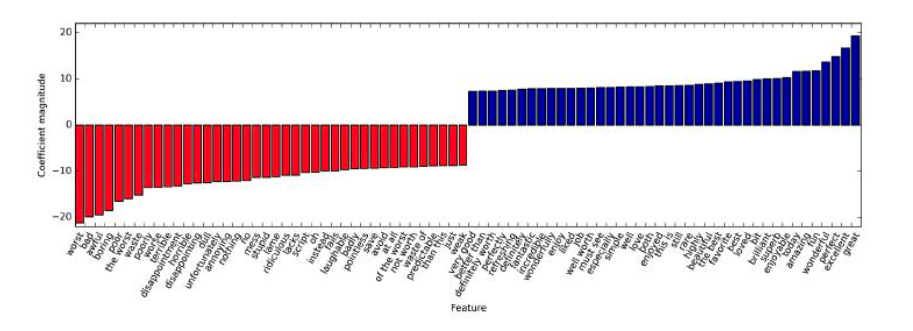